In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2522,0661-KBKPA,Male,0,Yes,Yes,53,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,78.75,3942.45,No
2081,5934-TSSAU,Female,0,Yes,Yes,23,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),75.30,1702.9,No
5296,8745-PVESG,Female,0,No,No,57,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,Yes,Credit card (automatic),41.10,2258.25,No
1021,3422-WJOYD,Male,0,Yes,No,28,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,54.35,1426.45,No
420,2233-FAGXV,Female,0,Yes,Yes,5,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,24.30,132.25,No


In [3]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [4]:
517400/df.shape[0]

73.46301292063042

In [5]:
df.drop('customerID',axis='columns',inplace=True)

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df.shape

(7043, 20)

In [11]:
df.iloc[488].TotalCharges

' '

In [12]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [13]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [16]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [17]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


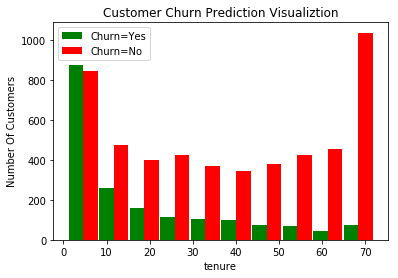

In [18]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

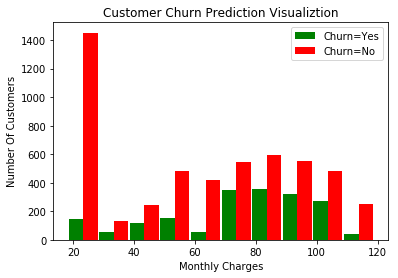

In [19]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [20]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [21]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [22]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [23]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [24]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [25]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [26]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [27]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [28]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3885,1,0,0,0,3,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3311,1,0,0,0,48,0,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
6333,1,1,0,0,60,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
1680,0,0,1,1,56,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
6295,1,0,1,1,48,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [29]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [30]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [31]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [32]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [33]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [34]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [35]:
from tensorflow_addons import losses

In [36]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [37]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [38]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5095 - accuracy: 0.7463
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4286 - accuracy: 0.7874
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4204 - accuracy: 0.8005
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4176 - accuracy: 0.8012
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4155 - accuracy: 0.8002
Epoch 6/100
176/176 [==============================] - 0s 972us/step - loss: 0.4140 - accuracy: 0.8037
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4112 - accuracy: 0.8043
Epoch 8/100
176/176 [==============================] - 0s 978us/step - loss: 0.4107 - accuracy: 0.8060
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.8075
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4071 - ac

176/176 [==============================] - 0s 949us/step - loss: 0.3608 - accuracy: 0.8316
Epoch 81/100
176/176 [==============================] - 0s 921us/step - loss: 0.3595 - accuracy: 0.8279
Epoch 82/100
176/176 [==============================] - 0s 961us/step - loss: 0.3591 - accuracy: 0.8311
Epoch 83/100
176/176 [==============================] - 0s 978us/step - loss: 0.3577 - accuracy: 0.8295
Epoch 84/100
176/176 [==============================] - 0s 955us/step - loss: 0.3575 - accuracy: 0.8283
Epoch 85/100
176/176 [==============================] - 0s 995us/step - loss: 0.3582 - accuracy: 0.8313
Epoch 86/100
176/176 [==============================] - 0s 990us/step - loss: 0.3568 - accuracy: 0.8309
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3569 - accuracy: 0.8327
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3560 - accuracy: 0.8300
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.355

In [39]:
#Class Count
count_class_0,count_class_1=df1.Churn.value_counts()

#Divide by class
df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]

In [40]:
df_class_0.shape

(5163, 27)

In [41]:
df_class_1.shape

(1869, 27)

In [42]:
#Under Sampling
df_class_0.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
259,1,1,1,0,0.394366,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
3828,1,0,1,0,0.901408,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [43]:
df_class_0.sample(count_class_1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1892,0,1,0,0,0.042254,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
4881,0,0,1,0,0.380282,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
372,0,0,0,1,0.323944,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
1594,1,0,0,1,0.859155,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
513,1,0,0,0,0.774648,1,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,1,1,1,0,0.577465,1,1,1,0,1,...,0,1,0,0,1,0,1,0,0,0
2847,1,0,1,0,0.352113,1,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
3073,1,0,0,0,0.718310,0,0,1,1,1,...,1,0,0,0,0,1,1,0,0,0
6905,0,0,0,1,0.408451,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [44]:
df_class_0_under=df_class_0.sample(count_class_1)
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.shape

(3738, 27)

In [45]:
x=df_test_under.drop('Churn',axis='columns')
y=df_test_under['Churn']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [46]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [47]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [48]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6237 - accuracy: 0.6900
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5293 - accuracy: 0.7512
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5064 - accuracy: 0.7589
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4966 - accuracy: 0.7612
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4903 - accuracy: 0.7615
Epoch 6/100
94/94 [==============================] - 0s 969us/step - loss: 0.4859 - accuracy: 0.7632
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7676
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4804 - accuracy: 0.7666
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4793 - accuracy: 0.7719
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4765 - accuracy: 0.7692
Epoch 1

94/94 [==============================] - 0s 979us/step - loss: 0.3980 - accuracy: 0.8154
Epoch 83/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3975 - accuracy: 0.8221
Epoch 84/100
94/94 [==============================] - 0s 926us/step - loss: 0.3975 - accuracy: 0.8194
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3952 - accuracy: 0.8197
Epoch 86/100
94/94 [==============================] - 0s 926us/step - loss: 0.3951 - accuracy: 0.8207
Epoch 87/100
94/94 [==============================] - 0s 926us/step - loss: 0.3939 - accuracy: 0.8181
Epoch 88/100
94/94 [==============================] - 0s 979us/step - loss: 0.3926 - accuracy: 0.8247
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3925 - accuracy: 0.8204
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3912 - accuracy: 0.8241
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8234
Epo

In [49]:
#over sampling
count_class_0,count_class_1

(5163, 1869)

In [50]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_class_1_over.shape,count_class_1

((5163, 27), 1869)

In [51]:
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)
df_test_over.shape

(10326, 27)

In [52]:
print(df_test_over.Churn.value_counts())

0    5163
1    5163
Name: Churn, dtype: int64


In [53]:
X=df_test_over.drop('Churn',axis='columns')
y=df_test_over['Churn']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [54]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [55]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5539 - accuracy: 0.7232
Epoch 2/100
259/259 [==============================] - 0s 951us/step - loss: 0.4932 - accuracy: 0.7582
Epoch 3/100
259/259 [==============================] - ETA: 0s - loss: 0.4863 - accuracy: 0.76 - 0s 1ms/step - loss: 0.4854 - accuracy: 0.7638
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4814 - accuracy: 0.7659
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.7695
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7702
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4732 - accuracy: 0.7728
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4714 - accuracy: 0.7713
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4686 - accuracy: 0.7758
Epoch 10/100
259/259 [=========================

259/259 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.8270
Epoch 81/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3847 - accuracy: 0.8269
Epoch 82/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3838 - accuracy: 0.8274
Epoch 83/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8312
Epoch 84/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.8283
Epoch 85/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3842 - accuracy: 0.8253
Epoch 86/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3817 - accuracy: 0.8292
Epoch 87/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3808 - accuracy: 0.8289
Epoch 88/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3812 - accuracy: 0.8291: 0s - loss: 0.3786 - accu
Epoch 89/100
259/259 [==============================] - 0s 1ms/step -

In [56]:
#SMOTE
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [57]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [58]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_sample(X,y)
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)

In [60]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [61]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5482 - accuracy: 0.7240
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4725 - accuracy: 0.7771
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4610 - accuracy: 0.7815
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4547 - accuracy: 0.7874
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4482 - accuracy: 0.7909
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4434 - accuracy: 0.7913
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.7943
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.7958
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.7998
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4273 - accura

259/259 [==============================] - 0s 1ms/step - loss: 0.3441 - accuracy: 0.8444
Epoch 80/100
259/259 [==============================] - 0s 966us/step - loss: 0.3446 - accuracy: 0.8479
Epoch 81/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3444 - accuracy: 0.8492
Epoch 82/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3436 - accuracy: 0.8454
Epoch 83/100
259/259 [==============================] - 0s 978us/step - loss: 0.3417 - accuracy: 0.8489
Epoch 84/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.8490
Epoch 85/100
259/259 [==============================] - 0s 985us/step - loss: 0.3422 - accuracy: 0.8510
Epoch 86/100
259/259 [==============================] - 0s 997us/step - loss: 0.3398 - accuracy: 0.8477
Epoch 87/100
259/259 [==============================] - 0s 985us/step - loss: 0.3400 - accuracy: 0.8496
Epoch 88/100
259/259 [==============================] - 0s 989us/step - loss: 0.3389 

In [62]:
#Use of Ensemble with undersampling
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [63]:
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [65]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [66]:
4130/3

1376.6666666666667

In [67]:
df3=X_train.copy()
df3['Churn']=y_train

In [68]:
df3_class0=df3[df3.Churn==0]
df3_class1=df3[df3.Churn==1]

In [69]:
df3_class0.shape,df3_class1.shape

((4130, 27), (1495, 27))

In [70]:
df3_class0[:1495].shape

(1495, 27)

In [71]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train=pd.concat([df_majority[start:end],df_minority],axis=0)
    X_train=df_train.drop('Churn',axis='columns')
    y_train=df_train.Churn
    return X_train,y_train

In [72]:
X_train,y_train=get_train_batch(df3_class0,df3_class1,0,1495)
y_pred1=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6415 - accuracy: 0.6415
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5426 - accuracy: 0.7525
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5029 - accuracy: 0.7676
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4926 - accuracy: 0.7615
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4898 - accuracy: 0.7645
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4838 - accuracy: 0.7706
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4808 - accuracy: 0.7736
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4787 - accuracy: 0.7719
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4761 - accuracy: 0.7726
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4734 - accuracy: 0.7706
Epoch 11/

94/94 [==============================] - 0s 1ms/step - loss: 0.4043 - accuracy: 0.8137
Epoch 83/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4032 - accuracy: 0.8144
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8137
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8167
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4023 - accuracy: 0.8164
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4011 - accuracy: 0.8167
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4006 - accuracy: 0.8174
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3995 - accuracy: 0.8211
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3982 - accuracy: 0.8197
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3984 - accuracy: 0.8191
Epoch 92/100


In [73]:
X_train,y_train=get_train_batch(df3_class0,df3_class1,1495,2990)
y_pred2=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.5732 - accuracy: 0.7278
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5144 - accuracy: 0.7565
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5007 - accuracy: 0.7585
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4926 - accuracy: 0.7659
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4854 - accuracy: 0.7706
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.7672
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7696
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7702
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.7682
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.7746
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3828 - accuracy: 0.8197
Epoch 83/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3823 - accuracy: 0.8207
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3808 - accuracy: 0.8211
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3806 - accuracy: 0.8241
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3785 - accuracy: 0.8217
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3776 - accuracy: 0.8201
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.8264
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3790 - accuracy: 0.8231
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3776 - accuracy: 0.8258
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.8201
Epoch 92/100


In [74]:
X_train,y_train=get_train_batch(df3_class0,df3_class1,2990,4130)
y_pred3=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6369 - accuracy: 0.6512
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5152 - accuracy: 0.7605
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.7666
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.7693
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.7757
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4753 - accuracy: 0.7772
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.7799
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.7822
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.7799
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.7837
Epoch 11/

83/83 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8300
Epoch 83/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.8345
Epoch 84/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3839 - accuracy: 0.8334
Epoch 85/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3802 - accuracy: 0.8311
Epoch 86/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.8345
Epoch 87/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3815 - accuracy: 0.8319
Epoch 88/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3790 - accuracy: 0.8338
Epoch 89/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3788 - accuracy: 0.8326
Epoch 90/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3787 - accuracy: 0.8326
Epoch 91/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3777 - accuracy: 0.8342
Epoch 92/100


In [75]:
len(y_pred1),len(y_pred2),len(y_pred3)

(1407, 1407, 1407)

In [76]:
y_pred_final=y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones=y_pred1[i]+y_pred2[i]+y_pred3[i]
    if n_ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0

In [77]:
print()

In [78]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.60       374

    accuracy                           0.73      1407
   macro avg       0.70      0.74      0.70      1407
weighted avg       0.79      0.73      0.74      1407

